### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train_df = pd.read_csv('datasets/animals/meta-data/train.csv')
test_df  = pd.read_csv('datasets/animals/meta-data/test.csv')
train_repo = 'datasets/animals/train/'

# images = []
# labels = []
# for index, row in train_df.iterrows():
#     img_name = train_repo + row['Image_id']
#     img = mpimg.imread(img_name)
#     images.append(img)
#     labels.append(row['Animal'])

### Study and Plot Data

In [3]:
print(train_df['Animal'].value_counts())

horse              1111
squirrel            808
antelope            695
german+shepherd     687
collie              680
seal                665
buffalo             606
grizzly+bear        583
otter               519
ox                  501
persian+cat         491
chimpanzee          477
rhinoceros          477
moose               476
hippopotamus        464
bobcat              418
wolf                403
chihuahua           386
dalmatian           359
raccoon             346
siamese+cat         341
bat                 256
rat                 220
killer+whale        193
spider+monkey       189
weasel              184
walrus              148
beaver              133
mouse               124
mole                 60
Name: Animal, dtype: int64


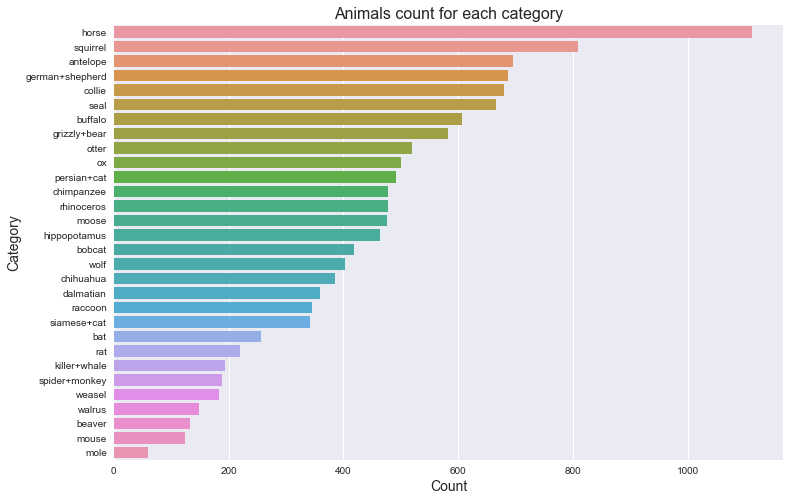

In [8]:
# Some visualization
plt.figure(figsize=(12, 8))
sns.barplot(y=animal_count.index, x=animal_count.values)
plt.title('Animals count for each category', fontsize=16)
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.show()

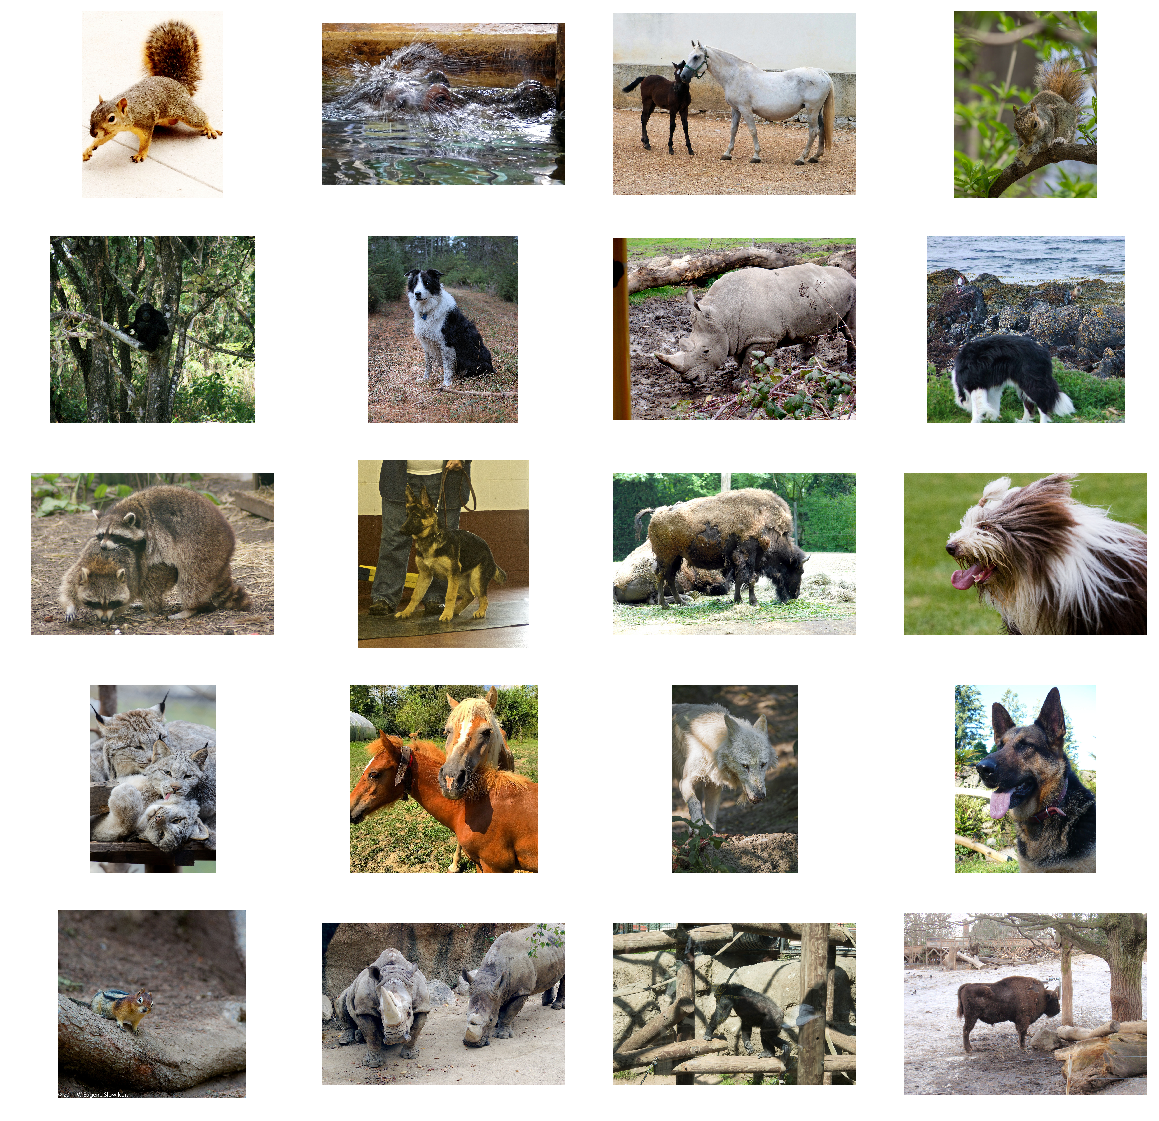

In [5]:
random_images = []
random_ids = []
while(len(random_ids) < 25):
    num = random.randint(1, 13000)
    if num not in random_ids:
        random_ids.append(num)
        random_images.append('Img-{}.jpg'.format(num))
w = 20
h = 20
fig = plt.figure(figsize=(w, h))
columns = 4
rows = 5

for i in range(1, columns*rows+1):
    img = mpimg.imread(train_repo+random_images[i])
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

### Start classification
We will be using tensorflow for classification of data

In [9]:
import tensorflow as tf
import time

def train_images(df):
    img_size = 3072 # 32 * 32 * 3
    batch_size = 100
    learning_rate = 0.005
    max_steps = 1000

    # Define input placeholders
    img_placeholders = tf.placeholder(tf.float32, shape=[None, img_size])
    lbl_placeholders = tf.placeholder(tf.int64, shape=[None])

    # Define variables
    weights = tf.Variable(tf.zeros([img_size, total_classes]))
    biases = tf.Variable(tf.zeros([total_classes]))

    # Define the classifier's result
    logits = tf.matmul(img_placeholders, weights) + biases

    # Define the loss function
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_placeholders))

    # Define the training operation
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Operation comparing prediction with true label
    correct_prediction = tf.equal(tf.argmax(logits, 1), lbl_placeholders)

    # Operation calculating the accuracy of our predictions
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        for i in range(max_steps):
            # Generate input data batch
            indices = np.random.choices(df['images_train'].shape[0], batch_size)
            images_batch = df['images_train'][indices]
            labels_batch = df['labels_train'][indices]
            
            # Periodically print out the model's current accuracy
            feed_dict = {
                img_placeholders: images_batch,
                lbl_placeholders: labels_batch
            }
            if i%100 == 0:
                train_accuracy = sess.run(accuracy, feed_dict=feed_dict)
                print('Step {:d}, training accuracy {:g}'.format(i, train_accuracy))
                
            # Perform a single training step
            sess.run([train_step, loss], feed_dict=feed_dict)
            
            # Periodically save checkpoint
            if (i+1)%1000 == 0:
                checkpoint_file = os.path.join(FLAGS.train_dir, 'checkpoint')
                saver.save(sess, checkpoint_file, global_step=i)
                print('Saved checkpoint')
                
        # After finishing the training, evaluate
        test_accuracy = sess.run(accuracy, feed_dict={
            img_placeholders: df['images_test'],
            lbl_placeholders: df['labels_test']
        })
        print('Test accuracy {:g}'.format(test_accuracy))